# Global indicator project - Phoenix, Arizona

## Street connectivity for walkability indicator (clean intersection density in walkable street network)
This notebook load the basic stats for pedestrain network within 10km buffered study regions and retian cleaned intersection density as a proxy for street connectivity. The OSM street network data are loaded from local data folder. This process should be ran after the '1_phoenix_download_osm.ipynb'. 


In [1]:
# Libraries used for OSMnx analyses and output
import networkx as nx
import time 
import os
import osmnx as ox
import matplotlib.pyplot as plt
import numpy as np
import requests
import pandas as pd
import geopandas as gpd

from shapely.geometry import shape,Point, LineString, Polygon
import config

ox.config(use_cache=True, log_console=True)
ox.__version__

'0.9'

### 1. Set up config

In [9]:
suffix = config.time
OSM_folder = config.OSM_data_loc
for place in config.places.values():
    place = place

### 2. plot the clean intersection/street connectivity

In [6]:
#load OSM walk street network
G = ox.load_graphml('{studyregion}_walk{suffix}.graphml'.format(studyregion = place, suffix = suffix), folder = OSM_folder)
G_proj = ox.project_graph(G)

In [ ]:
#retain cleaned intersections
intersections = ox.clean_intersections(G_proj, tolerance=15, dead_ends=False)
points = np.array([point.xy for point in intersections])

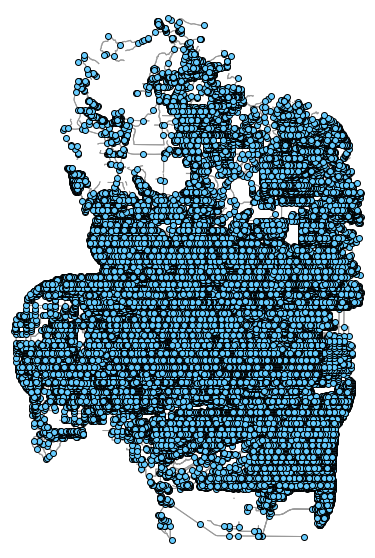

In [24]:
#plot the cleaned intersections
fig, ax = ox.plot_graph(G_proj, fig_height=10, show=False, close=False, node_alpha=0)
ax.scatter(x=points[:,0], y=points[:,1], zorder=2, color='#66ccff', edgecolors='k')
plt.show()

### 3. calculate stats: pedestrain street clean intersection density

In [10]:
gdf_nodes_proj = ox.graph_to_gdfs(G_proj, edges=False)
graph_area_m = gdf_nodes_proj.unary_union.convex_hull.area
        
stats = ox.basic_stats(G_proj, area=graph_area_m, clean_intersects=True, circuity_dist='euclidean', tolerance=15)
df = pd.DataFrame.from_dict(stats, orient='index', columns=['walk' + '_' + place])

In [21]:
df_intersect = df.loc[['clean_intersection_count', 'clean_intersection_density_km']]
df_intersect

,"walk_Phoenix, Arizona, USA"
clean_intersection_count,117619
clean_intersection_density_km,29.4527


### 4. write it into functions

In [22]:
def load_OSM_stats_clean_intersect(address):
        G = ox.load_graphml('{studyregion}_walk{suffix}.graphml'.format(studyregion = address, suffix = suffix), folder = OSM_folder)
        G_proj = ox.project_graph(G)
        
        gdf_nodes_proj = ox.graph_to_gdfs(G_proj, edges=False)
        graph_area_m = gdf_nodes_proj.unary_union.convex_hull.area
        
        stats = ox.basic_stats(G_proj, area=graph_area_m, clean_intersects=True, circuity_dist='euclidean', tolerance=15)
        df = pd.DataFrame.from_dict(stats, orient='index', columns=['walk' + '_' + address])
        df_intersect = df.loc[['clean_intersection_count', 'clean_intersection_density_km']]
        
        intersections = ox.clean_intersections(G_proj, tolerance=15, dead_ends=False)
        points = np.array([point.xy for point in intersections])
        fig, ax = ox.plot_graph(G_proj, fig_height=10, show=False, close=False, node_alpha=0)
        ax.scatter(x=points[:,0], y=points[:,1], zorder=2, color='#66ccff', edgecolors='gray', alpha=0.5)
        plt.show()
        return df_intersect

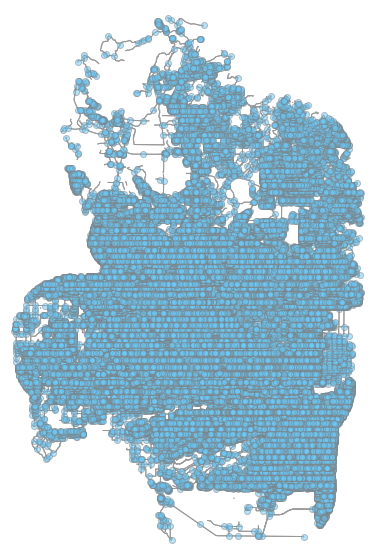

,"walk_Phoenix, Arizona, USA"
clean_intersection_count,117619
clean_intersection_density_km,29.4527


In [23]:
load_OSM_stats_clean_intersect(place)